In [1]:
import tensorflow as tf
import numpy as np

import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython import display

from iaf_dynamics import DVBFNoKL
from world import PendulumFullObs

def sample_batch(X, U, batch_size):
    sample = np.random.rand(batch_size) * X.shape[1]
    sample = sample.astype(int)

    batch_x = X[:, sample]
    batch_u = U[:, sample]
    
    return batch_x, batch_u

In [2]:
# Get the dataset
world = PendulumFullObs()
X, U, R, S = world.get_data_set(episodes=500, steps=50)

[2017-09-14 19:50:11,541] Making new env: Pendulum-v0


In [3]:
# Define the model
n_obs = 3
n_control = 1
n_latent =  4
n_enc = 10
learning_rate = 0.0001
min_learning_rate = 0.00001
decay_rate = 0.999
m = DVBFNoKL(n_obs, n_control, n_latent, n_enc, learning_rate)

(?, 4)
(?, 4)
(?, 4)


Tensor("scan/TensorArrayStack_2/TensorArrayGatherV3:0", shape=(?, ?), dtype=float32)
Tensor("scan/TensorArrayStack_1/TensorArrayGatherV3:0", shape=(?, ?, 4), dtype=float32)
Tensor("Neg:0", dtype=float32)


In [4]:
# Training parameters
training_epochs = 500
batch_size = 128
steps_per_epoch = X.shape[1] / batch_size
display_step = 10

epochs = []
total_loss = []

# Training cycle
for epoch in range(training_epochs):
    
    # Decay the learning rate
    if learning_rate > min_learning_rate:
        learning_rate *= decay_rate

    # Train one epoch 
    avg_total_loss = .0
    for i in range(steps_per_epoch):
        batch_x, batch_u = sample_batch(X, U, batch_size)
        temp_total_loss = m.train(batch_x, batch_u, learning_rate)
        avg_total_loss += temp_total_loss
    
    avg_total_loss /= steps_per_epoch
    
    total_loss.append(avg_total_loss)
    epochs.append(epoch)

    # Plot the results
    if epoch % display_step == 0:
                
        plt.close()
        f, axarr = plt.subplots(1, 1, figsize=(13, 4))
        axarr.plot(epochs, total_loss)
        axarr.set_xlabel('Epochs')
        axarr.set_title('Total Loss')
        axarr.annotate("Learning Rate: " + str(learning_rate), xy=(0.05, 0.05), xycoords='axes fraction')
        #axarr.set_ylim(-14.0, 10)

        display.display(plt.gcf())
        display.clear_output(wait=True)

InvalidArgumentError: Input to reshape is a tensor with 128 values, but the requested shape has 512
	 [[Node: Reshape_2 = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](MultivariateNormalDiag_4/log_prob/add, Reshape_2/shape)]]

Caused by op u'Reshape_2', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-2172bbc94f72>", line 9, in <module>
    m = DVBFNoKL(n_obs, n_control, n_latent, n_enc, learning_rate)
  File "iaf_dynamics.py", line 158, in __init__
    log_q0 = tf.reshape(q0.log_prob(z0), shape = [tf.shape(z0)[0],n_latent])
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2451, in reshape
    name=name)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sumit/Documents/pythonStuff/iaf_virtual2.7/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 128 values, but the requested shape has 512
	 [[Node: Reshape_2 = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](MultivariateNormalDiag_4/log_prob/add, Reshape_2/shape)]]


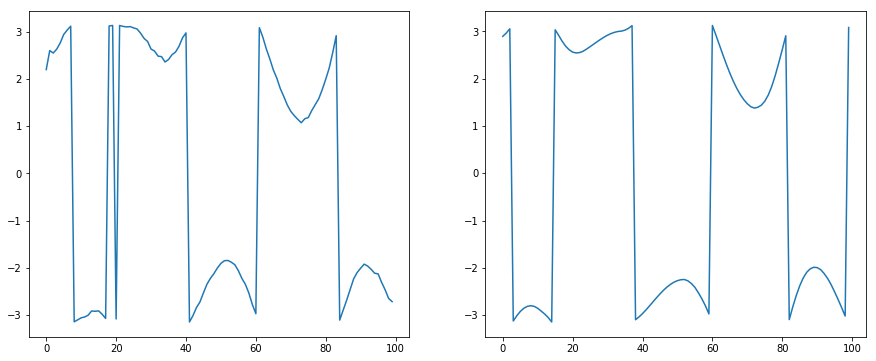

In [ ]:
# Get the true trajectory
X_temp, U_temp, R_temp, S_temp = world.get_data_set(episodes=100)
x_obs = m.sess.run((m.gen_x_mean), feed_dict={m.x: X_temp, m.u:U_temp})

# Plot the position and reward of low dim pendulum
e = int(np.random.rand() * 100)
f, axarr = plt.subplots(1, 2, figsize=(15, 6))
axarr[0].plot(np.arctan2(x_obs[:, e, 1], x_obs[:, e, 0]))
axarr[1].plot(np.arctan2(X_temp[:, e, 1], X_temp[:, e, 0]))
plt.show()